In [60]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [61]:
from youtube_transcript_api import YouTubeTranscriptApi

id_video = 'KpTBm_fg-Wk'
srt = YouTubeTranscriptApi.get_transcript(id_video, languages=['en'])

print(srt[-1])


{'text': 'you', 'start': 3884.0, 'duration': 2.079}


In [62]:
print(type(srt))
print(type(srt[-1]))

<class 'list'>
<class 'dict'>


In [63]:
with open("subtitles.txt", "w") as file:
    for i in srt:
        file.write(f'{i}\n')

## turn all text into one list

In [64]:
subtext = []
for i in range(len(srt)):
    subtext.append(srt[i].get('text'))
print(subtext)

['[Music]', '[Music]', '[Music]', 'hello and welcome', 'thank you for joining us', 'this is an unpack like no other', 'after two years of unprecedented', 'challenges', 'our world', 'has changed', 'as if our ways', 'of living', 'working connecting with one another', 'our personal values', 'even our responsibilities to each other', 'and to society', 'in our new world', 'technology has helped in ways we never', 'expected', 'enriching human connection creating', 'positive change', 'and helping all of us', 'build a better world today and for the', 'future', 'we believe that technological progress', 'and social progress are intertwined', 'over the years', 'samsung has put billions of devices in', 'the hands of users all around the world', 'and we know our global scale', 'and our spirit of openness give us a', 'unique responsibility', 'to use our reach to make the biggest', 'impact possible', 'and to help the next generation of', 'leaders and problem solvers make the', 'world a better place',

In [65]:
print(len(subtext))
print(subtext[100])

1476
technology can help us build back better


In [66]:
 subtext[:] = (value for value in subtext if value != '[Music]')
print(subtext)

['hello and welcome', 'thank you for joining us', 'this is an unpack like no other', 'after two years of unprecedented', 'challenges', 'our world', 'has changed', 'as if our ways', 'of living', 'working connecting with one another', 'our personal values', 'even our responsibilities to each other', 'and to society', 'in our new world', 'technology has helped in ways we never', 'expected', 'enriching human connection creating', 'positive change', 'and helping all of us', 'build a better world today and for the', 'future', 'we believe that technological progress', 'and social progress are intertwined', 'over the years', 'samsung has put billions of devices in', 'the hands of users all around the world', 'and we know our global scale', 'and our spirit of openness give us a', 'unique responsibility', 'to use our reach to make the biggest', 'impact possible', 'and to help the next generation of', 'leaders and problem solvers make the', 'world a better place', 'last year we launched galaxy ph

In [67]:
print(len(subtext))

1419


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
V = CountVectorizer()
X = V.fit_transform(subtext)

In [69]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
stopwords = set(STOPWORDS)

In [70]:
subtext_string = ' '.join(subtext)
print(subtext_string)

hello and welcome thank you for joining us this is an unpack like no other after two years of unprecedented challenges our world has changed as if our ways of living working connecting with one another our personal values even our responsibilities to each other and to society in our new world technology has helped in ways we never expected enriching human connection creating positive change and helping all of us build a better world today and for the future we believe that technological progress and social progress are intertwined over the years samsung has put billions of devices in the hands of users all around the world and we know our global scale and our spirit of openness give us a unique responsibility to use our reach to make the biggest impact possible and to help the next generation of leaders and problem solvers make the world a better place last year we launched galaxy photo planet our new sustainability vision as part of galaxy for the planet samsung is taking strong actio

In [71]:
subtext_list = []
for i in subtext:
    temp = ''
    for j in i:
        if j != ' ':
            temp +=j
        elif j == ' ':
            subtext_list.append(temp)
            temp = ''
stopwords = set(STOPWORDS)
subtext_stopped = []
for word in subtext_list:
    if word not in stopwords:
        subtext_stopped.append(word)
subtext_stopped

['hello',
 'thank',
 'joining',
 'unpack',
 'two',
 'years',
 'working',
 'connecting',
 'one',
 'personal',
 'even',
 'responsibilities',
 'new',
 'technology',
 'helped',
 'ways',
 'enriching',
 'human',
 'connection',
 'positive',
 'helping',
 'build',
 'better',
 'world',
 'today',
 'believe',
 'technological',
 'social',
 'progress',
 'samsung',
 'put',
 'billions',
 'devices',
 'hands',
 'users',
 'around',
 'know',
 'global',
 'spirit',
 'openness',
 'give',
 'us',
 'unique',
 'use',
 'reach',
 'make',
 'impact',
 'help',
 'next',
 'generation',
 'leaders',
 'problem',
 'solvers',
 'make',
 'world',
 'better',
 'last',
 'year',
 'launched',
 'galaxy',
 'planet',
 'new',
 'sustainability',
 'part',
 'galaxy',
 'planet',
 'taking',
 'strong',
 'actions',
 'across',
 'building',
 'energy',
 'technologies',
 'diverting',
 'waste',
 'minimizing',
 'plastics',
 'packaging',
 'making',
 'product',
 'cycles',
 'longer',
 'reduce',
 'soon',
 'will',
 'hear',
 'innovating',
 'recycled',
 

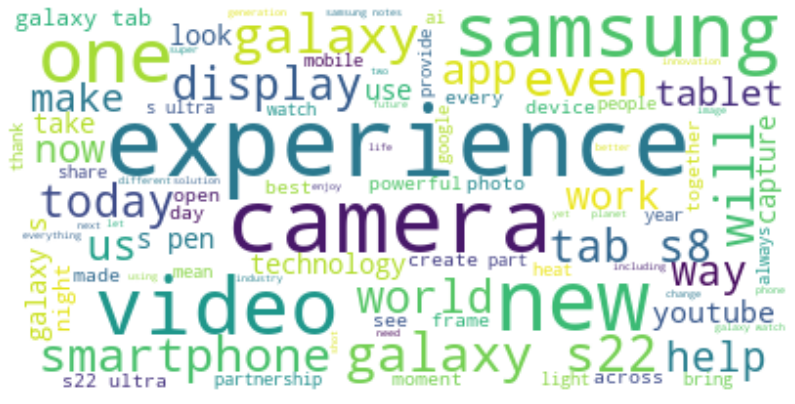

In [72]:
wordcloud = WordCloud(max_font_size=50, max_words=90, background_color="white").generate(subtext_string)
plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

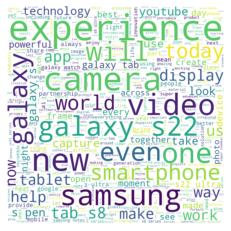

In [73]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white" ,max_words=2000 , max_font_size=256,
random_state=42, width=800, height=800).generate(subtext_string)
#plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

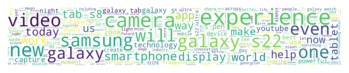

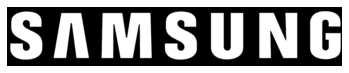

In [74]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask_22 = np.array(Image.open(path.join(d, "samsung-logo-png-samsung-logo-png-2104-copy-e1566468362978.png")))
wordcloud = WordCloud(stopwords=stopwords, background_color="white" ,max_words=2000 , max_font_size=90, height=mask_22.shape[0], width=mask_22.shape[1],random_state=42, mask=mask_22).generate(subtext_string)
#plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(mask_22, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [75]:
print(mask_22.shape)

(241, 1372)


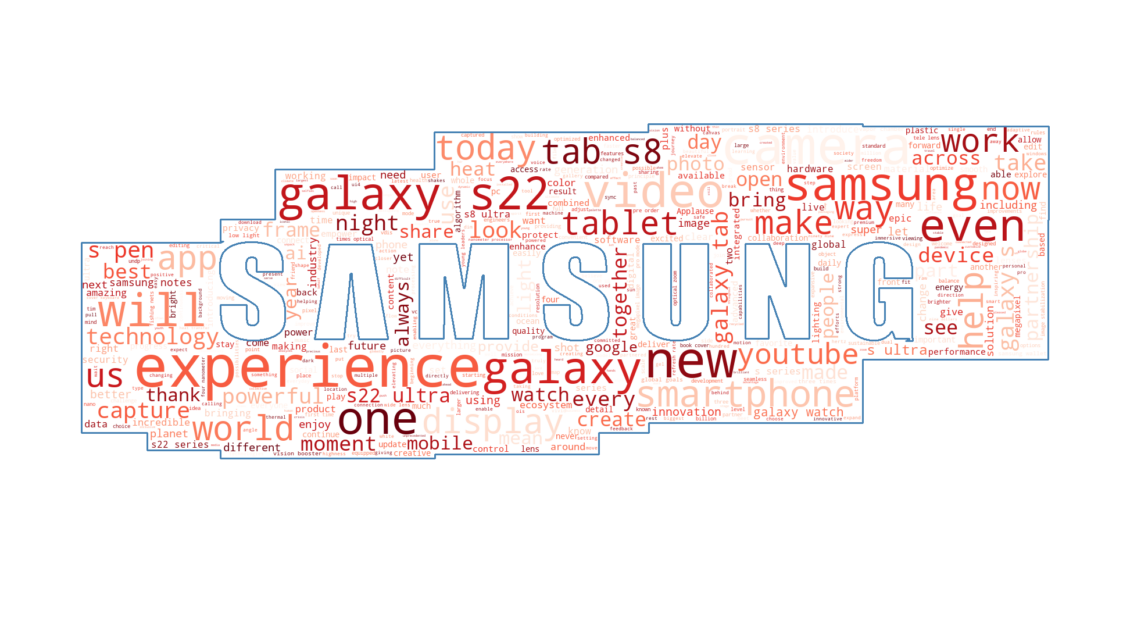

In [76]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
mask = np.array(Image.open("./samsung-logo-png-1294.png"))
wordcloud = WordCloud(max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Reds',
                      normalize_plurals=True,
                      mask=mask,
                      contour_width=3,
                      contour_color='steelblue',
                      background_color='white',
                      stopwords = STOPWORDS).generate(subtext_string)
# create coloring from image
#image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
#plt.savefig("news.png", format="png")
plt.show()

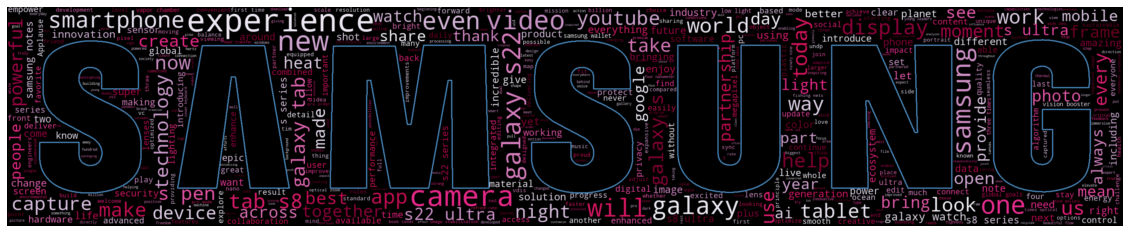

In [77]:
mask = np.array(Image.open("./samsung-logo-png-1300.png"))
wordcloud = WordCloud(max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='PuRd',
                      normalize_plurals=True,
                      mask=mask,
                      contour_width=3,
                      contour_color='steelblue',
                      background_color='black',
                      stopwords = STOPWORDS).generate(subtext_string)
# create coloring from image
#image_colors = ImageColorGenerator(mask)
wordcloud.to_file('output1300.png')
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
#
plt.show()


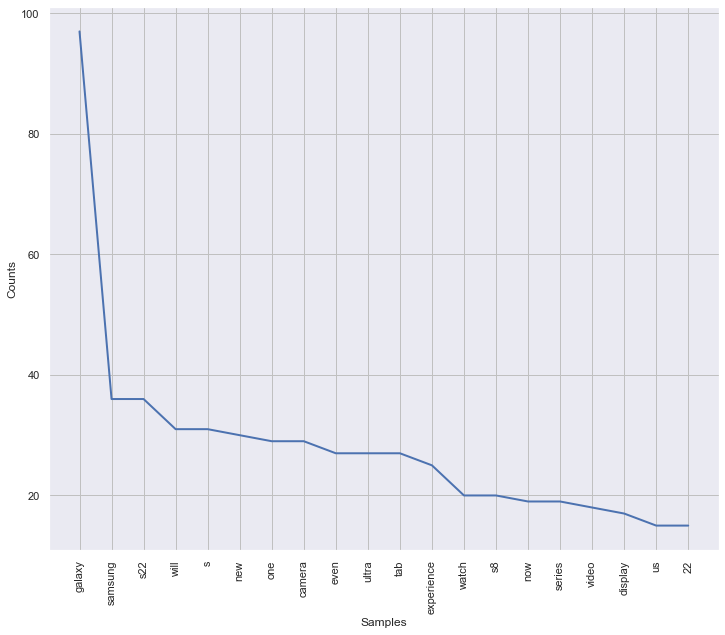

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [78]:
import nltk
%matplotlib inline
sns.set(rc={'figure.figsize':(12,10)})
sns.set_style( 'darkgrid')
# Create freq dist and plot
nlp_words = nltk.FreqDist(subtext_stopped)
nlp_words.plot(20)

In [80]:
nltk.download('punkt')
tokens = nltk.word_tokenize(subtext_string)
bigrams = nltk.bigrams(tokens)
frequence = nltk.FreqDist(bigrams)
for key, value in frequence.items():
    print(key,value)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andycheung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


('hello', 'and') 1
('and', 'welcome') 1
('welcome', 'thank') 1
('thank', 'you') 9
('you', 'for') 3
('for', 'joining') 2
('joining', 'us') 2
('us', 'this') 1
('this', 'is') 8
('is', 'an') 1
('an', 'unpack') 1
('unpack', 'like') 1
('like', 'no') 1
('no', 'other') 1
('other', 'after') 1
('after', 'two') 1
('two', 'years') 1
('years', 'of') 1
('of', 'unprecedented') 1
('unprecedented', 'challenges') 2
('challenges', 'our') 1
('our', 'world') 1
('world', 'has') 1
('has', 'changed') 2
('changed', 'as') 1
('as', 'if') 1
('if', 'our') 1
('our', 'ways') 1
('ways', 'of') 1
('of', 'living') 1
('living', 'working') 1
('working', 'connecting') 1
('connecting', 'with') 1
('with', 'one') 5
('one', 'another') 2
('another', 'our') 1
('our', 'personal') 1
('personal', 'values') 1
('values', 'even') 1
('even', 'our') 1
('our', 'responsibilities') 1
('responsibilities', 'to') 1
('to', 'each') 3
('each', 'other') 3
('other', 'and') 2
('and', 'to') 6
('to', 'society') 1
('society', 'in') 1
('in', 'our') 10


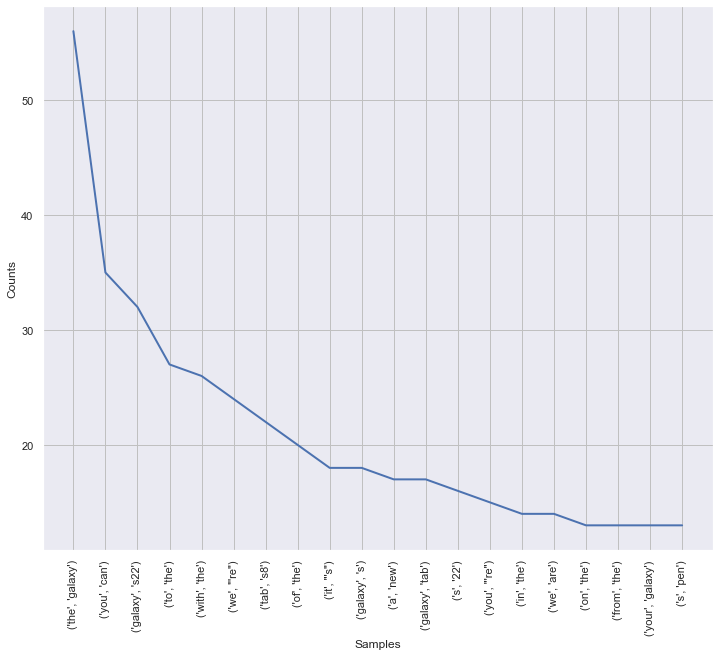

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [81]:
frequence.plot(20)